In [11]:
import os
from pathlib import Path

import crystal_toolkit  # noqa: F401
from pymatgen.core import Structure

In [ ]:
batch_name = "bandgap3.5b1"
batch_path = "../output"
cif_name = "gen_0"
cif_path = os.path.abspath(os.path.join(batch_path, batch_name, "extracted", f"{cif_name}.cif"))

print(f"Loading {cif_path}")

struct_expt = Structure.from_file(cif_path)
struct_expt

Loading d:\Projects\Sim\matsimx\matter_gen\output\bandgap3.5b1\extracted\gen_0.cif


In [25]:
# get reduced formula
reduced_formula = struct_expt.composition.reduced_formula
print(f"Reduced formula: {reduced_formula}")

output_dir = f"{batch_name}-{cif_name}-{reduced_formula}"

# mkdir in output folder named reduced_formula
os.makedirs(f"output/{output_dir}", exist_ok=True)

Reduced formula: NaTiSi2O7


## pbe

In [26]:
# Relax with pbe

import matcalc

calculator_pbe = matcalc.load_fp("pbe")
relax_calc = matcalc.RelaxCalc( # type: ignore
    calculator_pbe,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data = relax_calc.calc(struct_expt)


In [27]:
final_structure_pbe = data['final_structure']
print(final_structure_pbe)
final_structure_pbe

Full Formula (Na1 Ti1 Si2 O7)
Reduced Formula: NaTiSi2O7
abc   :   5.410395   5.412558   7.281183
angles:  68.313497  68.305994  59.987232
pbc   :       True       True       True
Sites (11)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Na    0.621184  0.519115  0.982402
  1  Ti    0.36397   0.261862  0.754748
  2  Si    0.776825  0.675066  0.514239
  3  Si    0.94316   0.840798  0.018507
  4  O     0.585803  0.484223  0.59985
  5  O     0.131495  0.028885  0.950281
  6  O     0.585542  0.971307  0.600457
  7  O     0.635618  0.029563  0.948892
  8  O     0.131964  0.532868  0.949478
  9  O     0.858994  0.757118  0.268909
 10  O     0.072893  0.483827  0.600713


In [28]:
phonon_calc = matcalc.PhononCalc( # type: ignore
    calculator_pbe,
    relax_structure=True,
    write_band_structure=f"output/{output_dir}/pbe_phonon_bs.yaml",
    write_total_dos=f"output/{output_dir}/pbe_phonon_dos.dat",
    write_phonon=f"output/{output_dir}/pbe_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_pbe = phonon_calc.calc(final_structure_pbe)

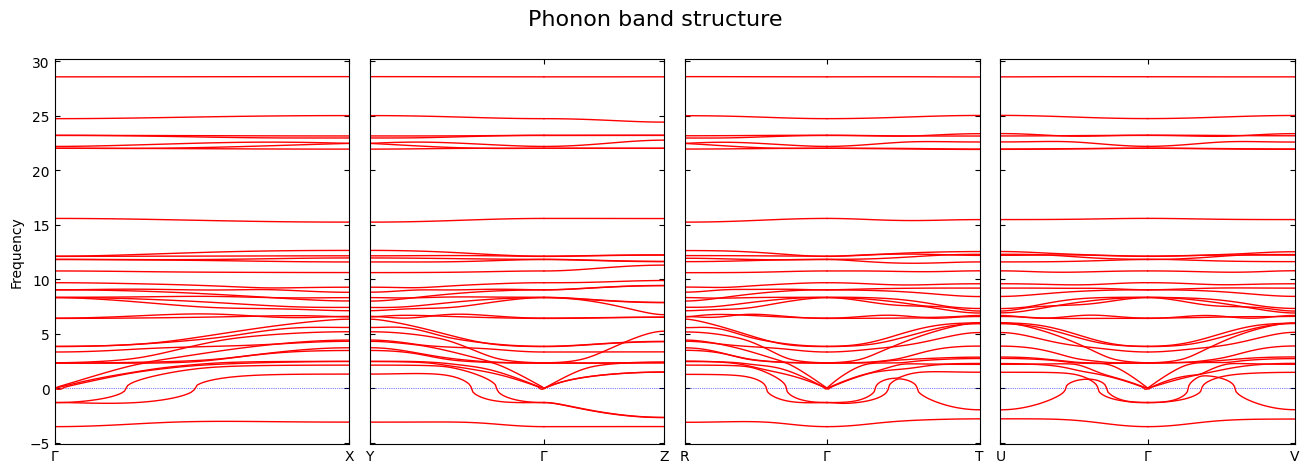

In [29]:
import matplotlib.pyplot as plt

phonon_bs = data_phonon_pbe['phonon'].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure", fontsize=16)
plt.subplots_adjust(wspace=0.07)
plt.show()


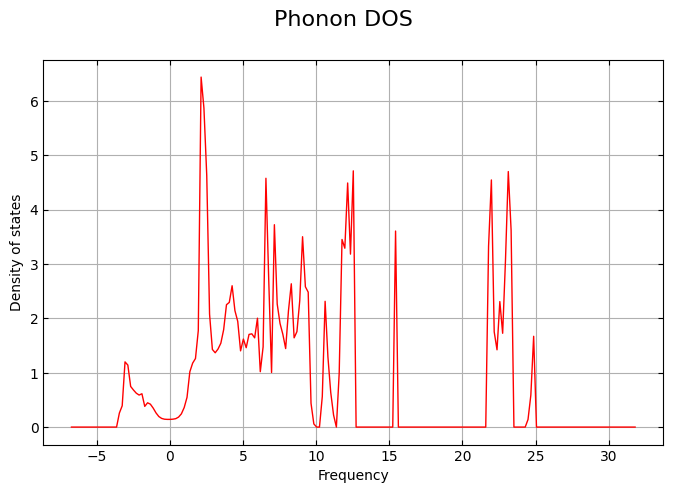

In [30]:
phonon_dos = data_phonon_pbe["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS", fontsize=16)
plt.show()

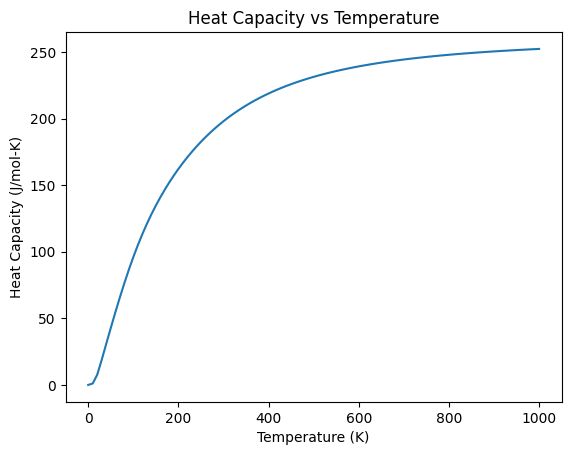

In [31]:
plt.plot(
    data_phonon_pbe['thermal_properties']['temperatures'],
    data_phonon_pbe['thermal_properties']['heat_capacity']
)

plt.xlabel("Temperature (K)")
plt.ylabel('Heat Capacity (J/mol-K)')
plt.title("Heat Capacity vs Temperature")
plt.show()

## r2scan

In [32]:
## Relax with r2scan

import matcalc

calculator_r2scan = matcalc.load_fp("r2scan")
relax_calc = matcalc.RelaxCalc(
    calculator_r2scan,
    optimizer="FIRE",
    relax_atoms=True,
    relax_cell=True
)

data_r2scan = relax_calc.calc(struct_expt)


In [33]:
final_structure_r2scan = data_r2scan['final_structure']
print(final_structure_r2scan)
final_structure_r2scan

Full Formula (Na1 Ti1 Si2 O7)
Reduced Formula: NaTiSi2O7
abc   :   5.373486   5.375370   7.227331
angles:  68.288658  68.285150  59.989718
pbc   :       True       True       True
Sites (11)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Na    0.623606  0.52142   0.975655
  1  Ti    0.363166  0.261109  0.757024
  2  Si    0.77713   0.675313  0.513597
  3  Si    0.942495  0.840164  0.020358
  4  O     0.5864    0.484693  0.601138
  5  O     0.130569  0.028068  0.949852
  6  O     0.586058  0.968876  0.601965
  7  O     0.637505  0.02874   0.948657
  8  O     0.131094  0.534962  0.949019
  9  O     0.858928  0.757045  0.268943
 10  O     0.070497  0.484242  0.602271


In [34]:
phonon_calc = matcalc.PhononCalc( # type: ignore
    calculator_r2scan,
    relax_structure=True,
    write_band_structure=f"output/{output_dir}/r2scan_phonon_bs.yaml",
    write_total_dos=f"output/{output_dir}/r2scan_phonon_dos.dat",
    write_phonon=f"output/{output_dir}/r2scan_phonon.yaml",
    optimizer="FIRE",
)

data_phonon_r2scan = phonon_calc.calc(final_structure_r2scan)

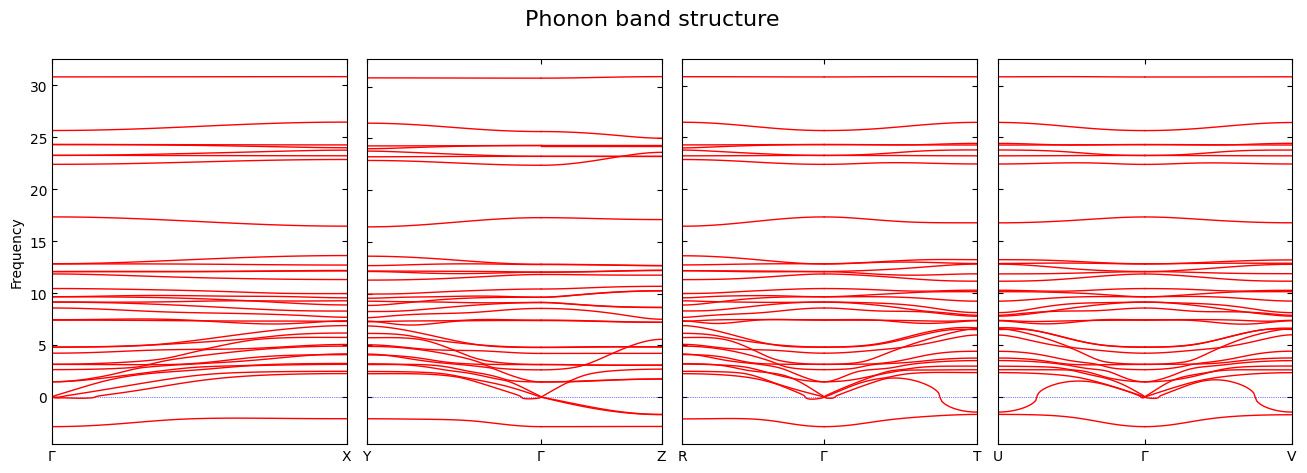

In [35]:
import matplotlib.pyplot as plt

phonon_bs = data_phonon_r2scan['phonon'].band_structure

n_axes = sum(1 for c in phonon_bs.path_connections if not c)

fig, axs = plt.subplots(1, n_axes, figsize=(16, 5))

if n_axes == 1:
    axs = [axs]

for ax in axs[1:]:
    ax.set_ylabel('')
    ax.tick_params(axis='y', labelleft=False)

phonon_bs.plot(ax=axs)
fig.suptitle("Phonon band structure", fontsize=16)
plt.subplots_adjust(wspace=0.07)
plt.show()


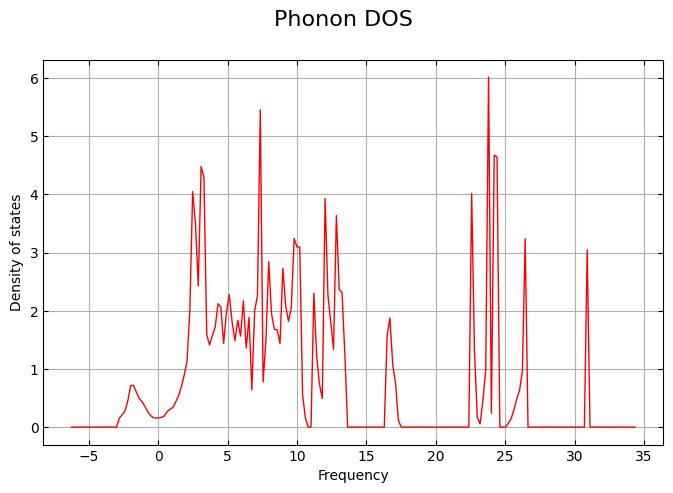

In [36]:
phonon_dos = data_phonon_r2scan["phonon"].total_dos

fig, ax = plt.subplots(figsize=(8, 5))
phonon_dos.plot(ax=ax)
fig.suptitle("Phonon DOS", fontsize=16)
plt.show()

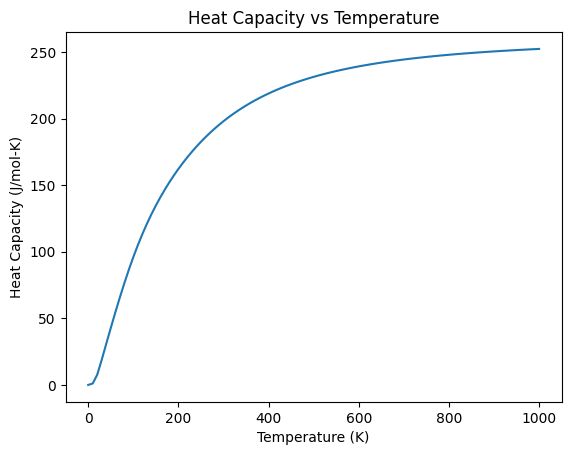

In [37]:
plt.plot(
    data_phonon_pbe['thermal_properties']['temperatures'],
    data_phonon_pbe['thermal_properties']['heat_capacity']
)

plt.xlabel("Temperature (K)")
plt.ylabel('Heat Capacity (J/mol-K)')
plt.title("Heat Capacity vs Temperature")
plt.show()